### <span style="color:orange">Machine Learning for Credit Risk Assessment: Enhancing Loan Approval Decisions in a Credit Card Company

**Python packages**

In [ ]:
import sys

!pip install ydata-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

The german_credit.arff file are used for this analysis. We can also uplaod the CSV file but with the CSV file, we shall have to define categorical and numeric data types correctly. In the case of arff files, the correct data types have been already defined. Run the following code snippet to load correct data types for the dataset in this project..

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="german_credit.arff"
data=arff.loadarff(data_file)

df_raw=pd.DataFrame(data[0])
for col in df_raw.columns:
  if df_raw[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df_raw[col] = df_raw[col].str.decode('utf-8')
#Look at loaded data and data types
print(df_raw.dtypes)



In [59]:
# Let's display first 10 records
df_raw.head(10)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18.0,4,2,1049.0,1,2,4.0,2,...,4,2,21.0,3,1,1.0,3,1.0,1,1
1,1,1,9.0,4,0,2799.0,1,3,2.0,3,...,2,1,36.0,3,1,2.0,3,2.0,1,1
2,1,2,12.0,2,9,841.0,2,4,2.0,2,...,4,1,23.0,3,1,1.0,2,1.0,1,1
3,1,1,12.0,4,0,2122.0,1,3,3.0,3,...,2,1,39.0,3,1,2.0,2,2.0,1,2
4,1,1,12.0,4,0,2171.0,1,3,4.0,3,...,4,2,38.0,1,2,2.0,2,1.0,1,2
5,1,1,10.0,4,0,2241.0,1,2,1.0,3,...,3,1,48.0,3,1,2.0,2,2.0,1,2
6,1,1,8.0,4,0,3398.0,1,4,1.0,3,...,4,1,39.0,3,2,2.0,2,1.0,1,2
7,1,1,6.0,4,0,1361.0,1,2,2.0,3,...,4,1,40.0,3,2,1.0,2,2.0,1,2
8,1,4,18.0,4,3,1098.0,1,1,4.0,2,...,4,3,65.0,3,2,2.0,1,1.0,1,1
9,1,2,24.0,2,3,3758.0,3,1,1.0,2,...,4,4,23.0,3,1,1.0,1,1.0,1,1


In [5]:
# look at meta information about data, such as null values
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

In [60]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df_raw.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,35.54200,1.407000,1.155000
std,12.058814,2822.75176,1.118715,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2319.50000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3972.25000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,75.00000,4.000000,2.000000


#### _<span style="color:orange"> Dealing with outliers_

<span style="color:orange"> Log Transformation:Duration of Credit(month), Credit Amount, and Age(year) 
Apply a log transformation to the numeric variables with outliers. This is particularly useful when the data has a right-skewed distribution.
 The following 3 attribtes  have a right skewed distribution
 1) Duration of credit, 
 2) Credit amount and 
 3) Age

In [61]:
import numpy as np

# df is our data frame and and 'duration of credit is one of the  the variable with outliers

df_raw['log_Duration of Credit (month)'] = np.log1p(df_raw['Duration of Credit (month)'])

In [62]:
df_raw['log_Credit Amount'] = np.log1p(df_raw['Credit Amount'])

In [63]:
df_raw['log_Age (years)'] = np.log1p(df_raw['Age (years)'])

In [64]:
# Let's display the first 5 records
df_raw.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,log_Duration of Credit (month),log_Credit Amount,log_Age (years)
0,1,1,18.0,4,2,1049.0,1,2,4.0,2,...,3,1,1.0,3,1.0,1,1,2.944439,6.956545,3.091042
1,1,1,9.0,4,0,2799.0,1,3,2.0,3,...,3,1,2.0,3,2.0,1,1,2.302585,7.937375,3.610918
2,1,2,12.0,2,9,841.0,2,4,2.0,2,...,3,1,1.0,2,1.0,1,1,2.564949,6.735780,3.178054
3,1,1,12.0,4,0,2122.0,1,3,3.0,3,...,3,1,2.0,2,2.0,1,2,2.564949,7.660585,3.688879
4,1,1,12.0,4,0,2171.0,1,3,4.0,3,...,1,2,2.0,2,1.0,1,2,2.564949,7.683404,3.663562


In [67]:
# i want to drop 'Duration of Credit (month)', 'Credit Amount', 'Age (year)' because, they are  log transofrmed
# Specify the columns to drop

columns_to_drop = ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']

# Create a new DataFrame, df,  by dropping the specified columns from df_raw
df = df_raw.drop(columns=columns_to_drop)

In [69]:
#Let's display the first 5 records after log transformation
df.head(5)

,Creditability,Account Balance,Payment Status of Previous Credit,Purpose,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,...,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,log_Duration of Credit (month),log_Credit Amount,log_Age (years)
0,1,1,4,2,1,2,4.0,2,1,4,...,3,1,1.0,3,1.0,1,1,2.944439,6.956545,3.091042
1,1,1,4,0,1,3,2.0,3,1,2,...,3,1,2.0,3,2.0,1,1,2.302585,7.937375,3.610918
2,1,2,2,9,2,4,2.0,2,1,4,...,3,1,1.0,2,1.0,1,1,2.564949,6.735780,3.178054
3,1,1,4,0,1,3,3.0,3,1,2,...,3,1,2.0,2,2.0,1,2,2.564949,7.660585,3.688879
4,1,1,4,0,1,3,4.0,3,1,4,...,1,2,2.0,2,1.0,1,2,2.564949,7.683404,3.663562


_There are two sections in this data setting for the German Credit card data set. First section only works if data already has numeric encoding, and second section converts any categorical values (e.g., string values) to numeric encoding._

### Section 1

**Let's develop a decison tree in Python**

In [70]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Our class column is Creditability here and everything else will be used as features
class_col_name='Creditability'

feature_names=df.columns[df.columns != class_col_name]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1)

Below is the code to train the decision tree. Set the max depth of the tree to 5, you can choose to change it or remove it.

In [71]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


If you want to learn more about any Python statement just use help function;
e.g., here  I am displaying help on decision tree

In [ ]:
help(tree.DecisionTreeClassifier)

Let's plot the tree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the "grpahviz function".

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph



In the tree above, decsion tree used the categorical attribute as numeric attribute and generated results. This is because values in each of the categorical attribute was already encoded as numbers (1,2,3...etc.). This type of categorical encoding to numeric values is called Label encoding. It is valid to use this sort of method but it has a disadvantage that higher number could mean bigger weight for a value but it may just be a different value. We shall see another method to avoid this below. If we had strings in values, then the above code would have generated an error. Recall that decision tree algorithm can handle categorical and numerical data but Sklearn's implementation can only handle numeric data types. So it is not a comprehensive implementation of decision tree.

In [12]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

In [13]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  8 201]]
TP:  201 , FP:  62 , TN:  29 , FN: 8


In [14]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



**In a similar way, we can train and test Naive Bayes**

Naive Bayes, NB measures the conditional probabilites of words by using their counts/frequencies in each document.we can use CountVectorizer class in Sklearn pacakge to convert documents and words into a table/matrix where each column represented a word and each row represented a document. In the case of the dataset that we are using now, it is already in the form of a table/matrix. Each row represents one record (a kinda document) and each column represents one attribute (a kinda word). After the matrix of frequencies, the remaining process is the same.

In [15]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [16]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


Let's understand our Naive Bayes model

In [17]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  20
Classes  ['0' '1']
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.66053824 -5.09289346 -7.52920224 -7.2442712  -0.02385625 -7.77176387
  -7.16792253 -7.18335493 -7.34322437 -8.16470272 -7.27277271 -7.3616411
  -4.77281549 -7.37473764 -7.66053824 -7.98653918 -7.23113472 -8.16470272
  -7.97617639 -8.28352364]
 [-6.96381256 -5.09018055 -7.03265538 -7.02592638 -0.03094527 -7.19521844
  -6.79713562 -6.95892257 -7.02443718 -7.89278845 -6.9965557  -7.21662871
  -4.4432513  -7.02816435 -7.36613136 -7.65976479 -6.96451308 -7.8874834
  -7.68825674 -7.98173594]]


Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. This means, it used different values of each feature as frequencies which semantically may or may not be correct, as a higher value (like 2 ,3 and more) would mean more weight. We can solve this using one-hot encoding later but some people use this form of encoding in practice too. For now, let's see classification report.

In [18]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.39      0.41      0.40        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.63      0.63       300



#### Section 2: Categorical to One-Hot (numeric) Encoding
#### This section works with all datasets
Now, let's try to create one-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [8]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
cat_cols=["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"\
          ,"Guarantors","Duration in Current address","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", \
          "Telephone","Foreign Worker"]
#*******
#for bank dataset uncomment following line
#cat_cols=["job","marital","education","default","housing","loan","contact","month","poutcome"]
#*******
#*******
# for Churn data set uncomment following line
#cat_cols=["State","Area Code", "Phone Number", "Inter Plan","VoiceMail Plan"]
#******


In [9]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot


,Creditability,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents,Account Balance_1,Account Balance_2,Account Balance_3,...,Type of apartment_2,Type of apartment_3,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
0,1,18.0,1049.0,4.0,21.0,1.0,1.0,True,False,False,...,False,False,False,False,True,False,True,False,True,False
1,1,9.0,2799.0,2.0,36.0,2.0,2.0,True,False,False,...,False,False,False,False,True,False,True,False,True,False
2,1,12.0,841.0,2.0,23.0,1.0,1.0,False,True,False,...,False,False,False,True,False,False,True,False,True,False
3,1,12.0,2122.0,3.0,39.0,2.0,2.0,True,False,False,...,False,False,False,True,False,False,True,False,False,True
4,1,12.0,2171.0,4.0,38.0,2.0,1.0,True,False,False,...,True,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24.0,1987.0,2.0,21.0,1.0,2.0,True,False,False,...,False,False,False,True,False,False,True,False,True,False
996,0,24.0,2303.0,4.0,45.0,1.0,1.0,True,False,False,...,True,False,False,False,True,False,True,False,True,False
997,0,21.0,12680.0,4.0,30.0,1.0,1.0,False,False,False,...,False,True,False,False,False,True,False,True,True,False
998,0,12.0,6468.0,2.0,52.0,1.0,1.0,False,True,False,...,True,False,False,False,False,True,False,True,True,False


In [10]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
# class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [11]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [12]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  64
Classes  ['0' '1']
Number of records for classes  [205. 495.]
Log prior probability for classes  [-1.22807036 -0.34652257]
Log conditional probability for each feature given a class
 [[ -5.07717035  -0.02043849  -7.11378092  -4.73218569  -7.94918926
   -8.1045397   -9.0550218   -9.30014426 -11.1789151  -10.05044985
  -10.6323714  -10.5810781   -8.84942256 -10.53228794  -9.96589246
   -9.46593651 -11.09190373 -11.96737246  -9.86323831  -9.77014789
  -12.47819809 -11.3795858  -10.80422166 -12.8836632  -10.53228794
   -8.55292986 -10.5810781  -11.3795858  -11.78505091 -10.44131616
  -10.74359703  -9.72666278  -9.32831514 -10.24460587  -9.70560937
  -10.74359703  -9.17009113  -9.01246219 -10.93775305  -8.33506336
  -11.09190373 -11.63090023 -10.31871384  -9.37211776  -9.96589246
   -9.20736252  -9.81561026  -9.68499008  -9.34270387  -9.70560937
   -9.93922422 -10.86876018  -8.53338526  -9.60651846  -8.74849664
  -10.175613   -12.19051602  -9.81561026  -8.7727893

We have probailities of a lot more features now.

See evaluation metrics below.

In [13]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 50  45]
 [ 61 144]]
TP:  144 , FP:  45 , TN:  50 , FN: 61


In [26]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.45      0.53      0.49        95
           1       0.76      0.70      0.73       205

    accuracy                           0.65       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.66      0.65      0.65       300



**Let's run decision tree on one-hot encoded data**

class Names ['1' '0']


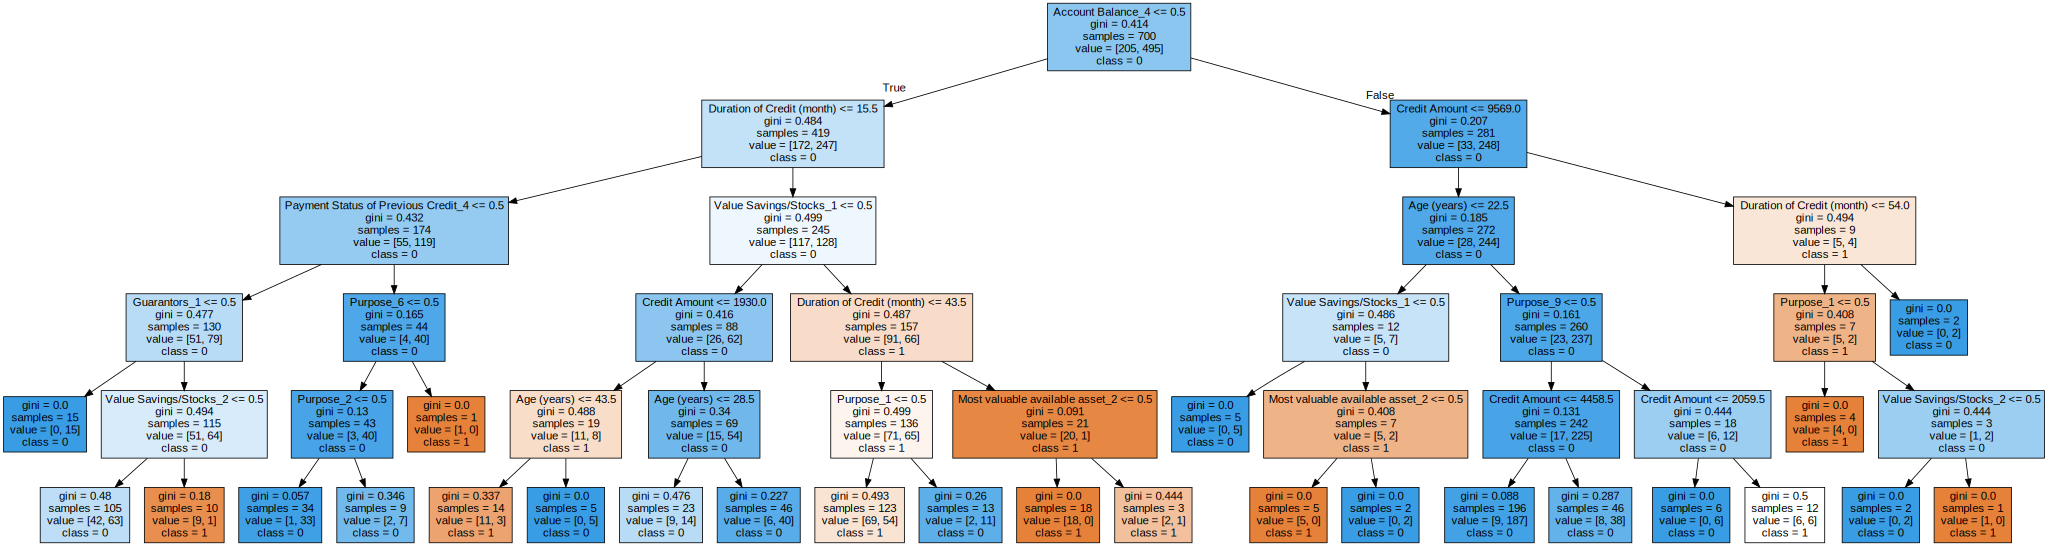

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=one_hot_feature_names,
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


In [28]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [29]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.52      0.51        95
           1       0.77      0.76      0.77       205

    accuracy                           0.68       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.69      0.68      0.68       300

